In [3]:
import pandas as pd

# Load dataset
df = pd.read_csv("./data/Model_data/uber.csv", header=0)  # Change this to your dataset path

# removing NAN
geo_data = df.dropna()

# removing rows that have'0'
geo_data_without_0 = geo_data.mask(geo_data == 0).dropna()
geo_data_without_0.info()


# Define valid geographic bounds
geo_data_cleaned = geo_data_without_0[
    (geo_data_without_0['pickup_longitude'].between(-180, 180)) &
    (geo_data_without_0['pickup_latitude'].between(-90, 90)) &
    (geo_data_without_0['dropoff_longitude'].between(-180, 180)) &
    (geo_data_without_0['dropoff_latitude'].between(-90, 90))]

# Reset index after filtering
geo_data_cleaned = geo_data_cleaned.reset_index(drop=True)

# Display the shape of the new DataFrame
print(f"Original dataset size: {df.shape[0]} rows")
print(f"Filtered dataset size: {geo_data_cleaned.shape[0]} rows")

<class 'pandas.core.frame.DataFrame'>
Index: 195342 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         195342 non-null  int64  
 1   key                195342 non-null  object 
 2   fare_amount        195342 non-null  float64
 3   pickup_datetime    195342 non-null  object 
 4   pickup_longitude   195342 non-null  float64
 5   pickup_latitude    195342 non-null  float64
 6   dropoff_longitude  195342 non-null  float64
 7   dropoff_latitude   195342 non-null  float64
 8   passenger_count    195342 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 14.9+ MB
Original dataset size: 200000 rows
Filtered dataset size: 195330 rows


In [12]:
# Select relevant columns
geo_columns = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']

# Compute min and max values for each column
min_max_values = geo_data_cleaned[geo_columns].agg(['min', 'max'])

print(min_max_values)


     pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude
min        -93.824668       -74.015515         -75.458979        -74.015750
max         40.808425        48.018760          40.831932         45.031598


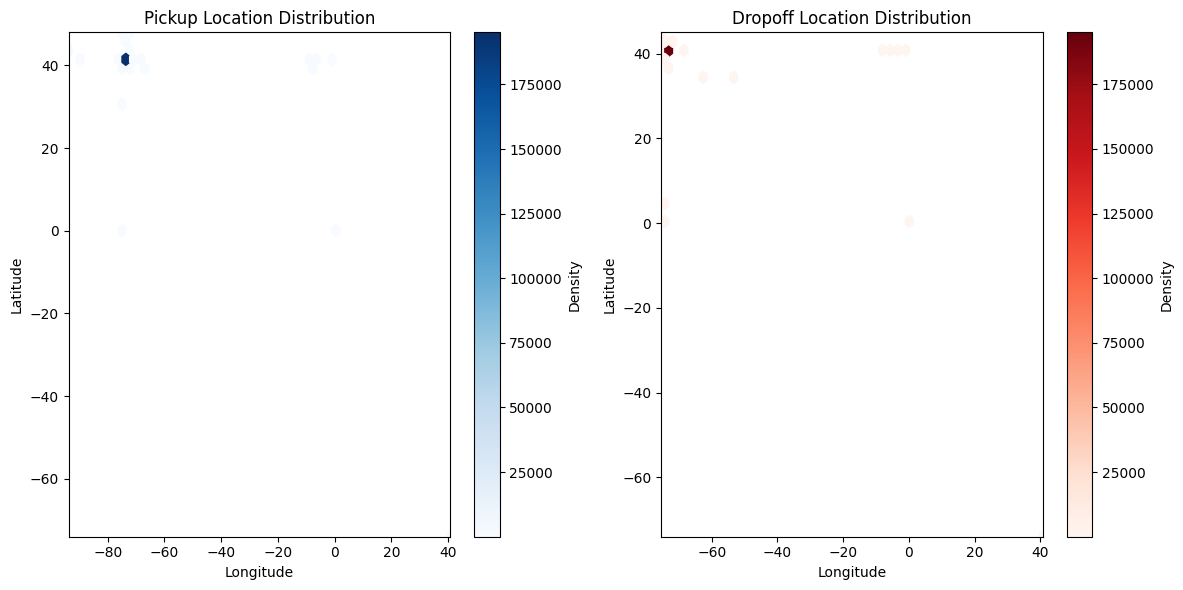

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(12, 6))

# Pickup Locations - Hexbin Plot
plt.subplot(1, 2, 1)
plt.hexbin(geo_data_cleaned["pickup_longitude"], geo_data_cleaned["pickup_latitude"], gridsize=50, cmap="Blues", mincnt=1)
plt.xlim(-93.824668, 40.808425)
plt.ylim(-74.015515, 48.018760)
plt.title("Pickup Location Distribution")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar(label="Density")

# Dropoff Locations - Hexbin Plot
plt.subplot(1, 2, 2)
plt.hexbin(geo_data_cleaned["dropoff_longitude"], geo_data_cleaned["dropoff_latitude"], gridsize=50, cmap="Reds", mincnt=1)
plt.xlim(-75.458979, 40.831932)
plt.ylim(-74.015750, 45.031598)
plt.title("Dropoff Location Distribution")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar(label="Density")

plt.tight_layout()
plt.show()



In [5]:
import folium
from folium.plugins import HeatMap

# Create a base map centered around a reasonable location
m = folium.Map(location=[40.7, -74.0], zoom_start=12)

# Add HeatMap for pickups
heat_data = list(zip(geo_data_cleaned["pickup_latitude"], geo_data_cleaned["pickup_longitude"]))
HeatMap(heat_data, radius=10).add_to(m)

# Show the map
m.save("distribution_map.html")


In [6]:


# Select relevant columns
cols = ["fare_amount", "passenger_count"]

# Compute variance and standard deviation
variance = geo_data_cleaned[cols].var()
std_dev = geo_data_cleaned[cols].std()

# Display results
print("Variance:\n", variance)
print("\nStandard Deviation:\n", std_dev)


Variance:
 fare_amount        96.203306
passenger_count     1.923755
dtype: float64

Standard Deviation:
 fare_amount        9.808328
passenger_count    1.386995
dtype: float64


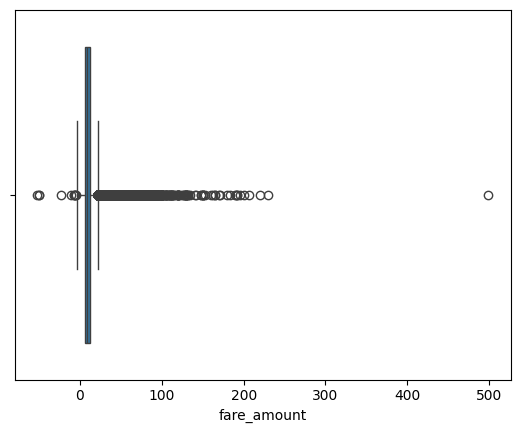

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=geo_data_cleaned["fare_amount"])
plt.show()


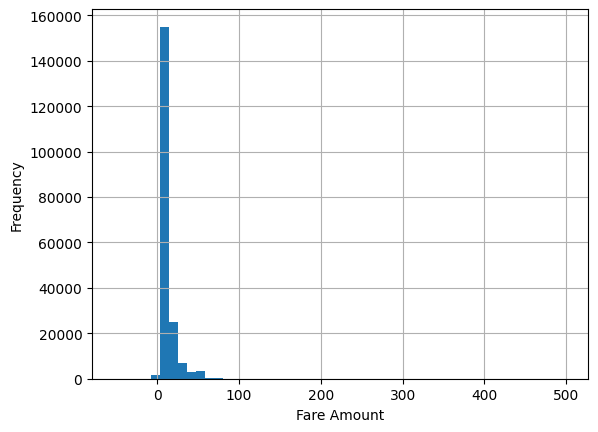

In [8]:
geo_data_cleaned["fare_amount"].hist(bins=50)
plt.xlabel("Fare Amount")
plt.ylabel("Frequency")
plt.show()


In [9]:
geo_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195330 entries, 0 to 195329
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         195330 non-null  int64  
 1   key                195330 non-null  object 
 2   fare_amount        195330 non-null  float64
 3   pickup_datetime    195330 non-null  object 
 4   pickup_longitude   195330 non-null  float64
 5   pickup_latitude    195330 non-null  float64
 6   dropoff_longitude  195330 non-null  float64
 7   dropoff_latitude   195330 non-null  float64
 8   passenger_count    195330 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 13.4+ MB


In [11]:

# Select only geographic columns
geo_cols = ["pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude"]



# Compute Q1 (25th percentile) and Q3 (75th percentile)
Q1 = geo_data_cleaned[geo_cols].quantile(0.25)
Q3 = geo_data_cleaned[geo_cols].quantile(0.75)
IQR = Q3 - Q1

# Define outlier limits
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = ((geo_data_cleaned[geo_cols] < lower_bound) | (geo_data_cleaned[geo_cols] > upper_bound)).any(axis=1)

df_cleaned = geo_data_cleaned[~outliers]

# Create a base map centered around a reasonable location
m = folium.Map(location=[40.7, -74.0], zoom_start=12)

# Add HeatMap for pickups
heat_data = list(zip(df_cleaned["pickup_latitude"], df_cleaned["pickup_longitude"]))
HeatMap(heat_data, radius=10).add_to(m)

# Show the map
m.save("Testing_distribution_map_pickup.html")



In [18]:
geo_data_cleaned.info()
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195330 entries, 0 to 195329
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         195330 non-null  int64  
 1   key                195330 non-null  object 
 2   fare_amount        195330 non-null  float64
 3   pickup_datetime    195330 non-null  object 
 4   pickup_longitude   195330 non-null  float64
 5   pickup_latitude    195330 non-null  float64
 6   dropoff_longitude  195330 non-null  float64
 7   dropoff_latitude   195330 non-null  float64
 8   passenger_count    195330 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 13.4+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 171349 entries, 0 to 195329
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         171349 non-null  int64  
 1   key                171349 non-n

In [26]:
import pandas as pd
import numpy as np
import folium
from folium.plugins import MarkerCluster
from sklearn.cluster import KMeans
from shapely.geometry import MultiPoint, Polygon


# Combine pickup and drop-off locations
pickup_points = df_cleaned[['pickup_longitude', 'pickup_latitude']].values
# dropoff_points = geo_data[['dropoff_longitude', 'dropoff_latitude']].values
# all_points = np.vstack((pickup_points, dropoff_points))  # Merge all coordinates

# Apply K-Means Clustering
num_clusters = 5  # Adjust based on dataset
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
labels = kmeans.fit_predict(pickup_points)
cluster_centers = kmeans.cluster_centers_

# Create a Folium map
map_center = [np.mean(pickup_points[:, 1]), np.mean(pickup_points[:, 0])]
m = folium.Map(location=map_center, zoom_start=12)

# Add clustered data points to the map
marker_cluster = MarkerCluster().add_to(m)
for point, label in zip(pickup_points, labels):
    folium.Marker(
        location=[point[1], point[0]], 
        icon=folium.Icon(color="blue"),
        popup=f"Cluster {label}"
    ).add_to(marker_cluster)

# Convert clusters into polygons
for cluster_label in range(num_clusters):
    cluster_points = pickup_points[labels == cluster_label]  # Get points for each cluster
    if len(cluster_points) >= 3:  # Convex hull requires at least 3 points
        polygon = MultiPoint(cluster_points).convex_hull  # Create convex hull
        polygon_coords = [(lat, lon) for lon, lat in polygon.exterior.coords]  # Convert to lat/lon

        # Add polygon to the map
        folium.Polygon(
            locations=polygon_coords,
            color="red",
            fill=True,
            fill_color="red",
            fill_opacity=0.3,
            popup=f"Cluster {cluster_label} Polygon"
        ).add_to(m)

# Save map to an HTML file
m.save("taxi_clusters_with_polygons.html")
print("Map saved as taxi_clusters_with_polygons.html. Open it in a browser to view.")




Map saved as taxi_clusters_with_polygons.html. Open it in a browser to view.
